## 5. Set Pieces

In [40]:
# standard imports
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime, timedelta
import ast
from matplotlib.patches import Patch

# specfic soccer analysis packages
from mplsoccer import Pitch, Sbopen, VerticalPitch

# load custom functions
from src.visualization import *
from src.dataloader import dataloader

Analysis of Attacks for slowenia:

In [2]:
# Filter all slowenia games
# Read the CSV file with matchids into a pandas df
df_matchids = pd.read_csv('../matchids.csv')
print(df_matchids.head(1))

matchids_wys = df_matchids[(df_matchids['home'] == 'Slovenia') | (df_matchids['away'] == 'Slovenia')]['wyscout']


   wyscout  skillcorner        date        home result      away
0  5414103          NaN  2023-03-23  Kazakhstan    1-2  Slovenia


In [3]:
match_id = "5414302" # slov-den
df_events = dataloader(match_id)

In [4]:
df_events.columns

Index(['Unnamed: 0', 'id', 'matchId', 'matchPeriod', 'minute', 'second',
       'matchTimestamp', 'videoTimestamp', 'relatedEventId', 'shot',
       'groundDuel', 'aerialDuel', 'infraction', 'carry', 'type.primary',
       'type.secondary', 'location.x', 'location.y', 'team.id', 'team.name',
       'team.formation', 'opponentTeam.id', 'opponentTeam.name',
       'opponentTeam.formation', 'player.id', 'player.name', 'player.position',
       'pass.accurate', 'pass.angle', 'pass.height', 'pass.length',
       'pass.recipient.id', 'pass.recipient.name', 'pass.recipient.position',
       'pass.endLocation.x', 'pass.endLocation.y', 'possession.id',
       'possession.duration', 'possession.types', 'possession.eventsNumber',
       'possession.eventIndex', 'possession.startLocation.x',
       'possession.startLocation.y', 'possession.endLocation.x',
       'possession.endLocation.y', 'possession.team.id',
       'possession.team.name', 'possession.team.formation',
       'possession.attack.w

In [5]:
df_events['type.primary'].unique()

array(['pass', 'interception', 'duel', 'touch', 'infraction', 'free_kick',
       'game_interruption', 'throw_in', 'shot', 'goal_kick', 'corner',
       'shot_against', 'clearance', 'acceleration', 'offside',
       'goalkeeper_exit'], dtype=object)

In [6]:
# string to list
df_events['possession.types'].unique()

array(["['attack']", '[]', "['set_piece_attack', 'attack', 'free_kick']",
       "['transition_low']", nan, "['set_piece_attack', 'free_kick']",
       "['throw_in']", "['attack', 'throw_in']", "['transition_medium']",
       "['attack', 'transition_high']",
       "['corner', 'set_piece_attack', 'attack']",
       "['attack', 'transition_medium']",
       "['set_piece_attack', 'attack', 'free_kick', 'direct_free_kick']",
       "['corner', 'set_piece_attack']", "['attack', 'transition_low']",
       "['set_piece_attack', 'attack', 'free_kick', 'free_kick_cross']"],
      dtype=object)

In [7]:
# Corner events
df_corners = df_events[df_events['type.primary']=='corner']

# Corner for Slovenia
df_corners_svn = df_corners[df_corners["team.name"] == "Slovenia"]
corners_svn = df_corners_svn.shape[0]

# Coorner for Opponent
df_corners_opp = df_corners[df_corners["opponentTeam.name"] == "Slovenia"]
corners_opp = df_corners_opp.shape[0]

# Display data
display("Corner Events for Slovenia: ", df_corners_svn)
display("Corner Events for Opposition: ", df_corners_opp)

'Corner Events for Slovenia: '

,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
953,953,1854206174,5414302,2H,49,24,00:49:24.578,3103.578111,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1709,1709,1854207077,5414302,2H,93,6,01:33:06.784,5725.784877,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Corner Events for Opposition: '

,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
146,146,1854206261,5414302,1H,8,13,00:08:13.376,494.376452,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,786,1854207082,5414302,1H,42,29,00:42:29.700,2550.700000,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,837,1854207122,5414302,1H,45,11,00:45:11.586,2712.586170,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,968,1854207317,5414302,2H,50,39,00:50:39.967,3178.967401,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,1010,1854207290,5414302,2H,52,48,00:52:48.575,3307.575714,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,1015,1854207289,5414302,2H,53,20,00:53:20.568,3339.568327,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160,1160,1854207395,5414302,2H,63,12,01:03:12.809,3931.809206,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,1436,1854207721,5414302,2H,78,44,01:18:44.493,4863.493788,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
shots_svn = (df_corners_svn['possession.attack.withShot'] == True).sum()
shots_on_goal_svn = (df_corners_svn['possession.attack.withShotOnGoal'] == True).sum()
goals_scored_svn = (df_corners_svn['possession.attack.withGoal'] == True).sum()
xgoal_svn = df_corners_svn[~df_corners_svn['possession.attack.xg'].isnull()]['possession.attack.xg'].sum().round(2)

print(" Shots after corner for Slovenia: ", shots_svn, "\n", \
"Shots on Goal after corner for Slovenia: ",shots_on_goal_svn, "\n", \
"Goals scored after corner for Slovenia: ", goals_scored_svn, "\n", \
"Expected Goals after corner for Slovenia: ", xgoal_svn)


 Shots after corner for Slovenia:  1 
 Shots on Goal after corner for Slovenia:  0 
 Goals scored after corner for Slovenia:  0 
 Expected Goals after corner for Slovenia:  0.01


In [9]:
shots_opp = (df_corners_opp['possession.attack.withShot'] == True).sum()
shots_on_goal_opp = (df_corners_opp['possession.attack.withShotOnGoal'] == True).sum()
goals_scored_opp = (df_corners_opp['possession.attack.withGoal'] == True).sum()
xgoal_opp = df_corners_opp[~df_corners_opp['possession.attack.xg'].isnull()]['possession.attack.xg'].sum().round(2)

print(" Shots after corner for Opponent: ", shots_opp, "\n", \
"Shots on Goal after corner for Opponent: ",shots_on_goal_opp, "\n", \
"Goals scored after corner for Opponent: ", goals_scored_opp, "\n", \
"Expected Goals after corner for Opponent: ", xgoal_opp)


 Shots after corner for Opponent:  3 
 Shots on Goal after corner for Opponent:  2 
 Goals scored after corner for Opponent:  1 
 Expected Goals after corner for Opponent:  0.33


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


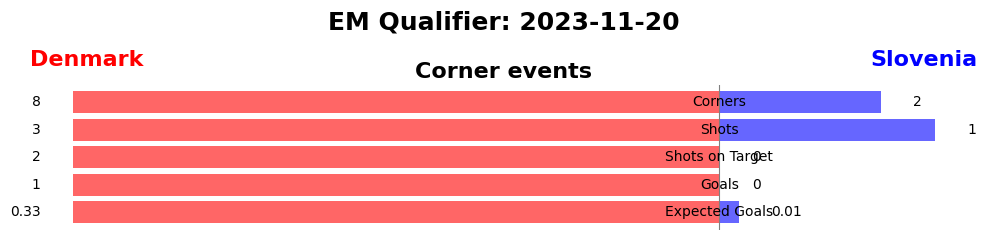

In [10]:
# From Yves
svn_data = {'Corners': corners_svn,
            'Shots': shots_svn,
            'Shots on Target': shots_on_goal_svn,
            'Goals': goals_scored_svn,
            'Expected Goals': xgoal_svn,
            }

opp_data = {'Corners': corners_opp,
            'Shots': shots_opp,
            'Shots on Target': shots_on_goal_opp,
            'Goals': goals_scored_opp,
            'Expected Goals': xgoal_opp,
            }

# if category % do not normalize
perc_categories = []

plot_stats_barchart(svn_data, opp_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='Corner events', team1_color='blue', team2_color='red')


### Corners leading to counterattacks againts Slovenia

In [11]:
# Counterattack events
df_counterattacks = df_events[df_events['possession.types'].apply(lambda x: 'counterattack' in x if pd.notna(x) else False)]

# Counterattack for Slovenia
df_counterattacks_svn = df_counterattacks[df_counterattacks["team.name"] == "Slovenia"]

# Counterattack against Slovenia
df_counterattacks_opp = df_counterattacks[df_counterattacks["opponentTeam.name"] == "Slovenia"]


In [12]:
# Get all corner timestamps (problems with overtime)
corner_ts_list_svn = df_corners_svn['matchTimestamp'].to_list()
display(corner_ts_list_svn)

corner_ts_list_opp = df_corners_opp['matchTimestamp'].to_list()
display(corner_ts_list_opp)

['00:49:24.578', '01:33:06.784']

['00:08:13.376',
 '00:42:29.700',
 '00:45:11.586',
 '00:50:39.967',
 '00:52:48.575',
 '00:53:20.568',
 '01:03:12.809',
 '01:18:44.493']

In [13]:
# Get all counter attack timestamps (problems with overtime)
counterattack_ts_list_opp = df_counterattacks_opp['matchTimestamp'].to_list()
display(counterattack_ts_list_opp)

# Get all counter attack timestamps (problems with overtime)
counterattack_ts_list_svn = df_counterattacks_svn['matchTimestamp'].to_list()
display(counterattack_ts_list_svn)

[]

[]

In [14]:
counterattacks_recveived_opp = 0

for corner_ts in corner_ts_list_opp:
    corner_ts = datetime.strptime(corner_ts, '%H:%M:%S.%f')
    for counterattack_ts in counterattack_ts_list_svn:
        counterattack_ts = datetime.strptime(counterattack_ts, '%H:%M:%S.%f')

        if counterattack_ts < corner_ts:
            continue
        
        if counterattack_ts - corner_ts >= timedelta(minutes=2):
            break
        
        counterattacks_recveived_opp += 1

print(counterattacks_recveived_opp)

0


In [15]:
counterattacks_recveived_svn = 0

for corner_ts in corner_ts_list_svn:
    corner_ts = datetime.strptime(corner_ts, '%H:%M:%S.%f')
    for counterattack_ts in counterattack_ts_list_opp:
        counterattack_ts = datetime.strptime(counterattack_ts, '%H:%M:%S.%f')

        if counterattack_ts < corner_ts:
            continue
        
        if counterattack_ts - corner_ts >= timedelta(minutes=2):
            break
        
        counterattacks_recveived_svn += 1

print(counterattacks_recveived_svn)

0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


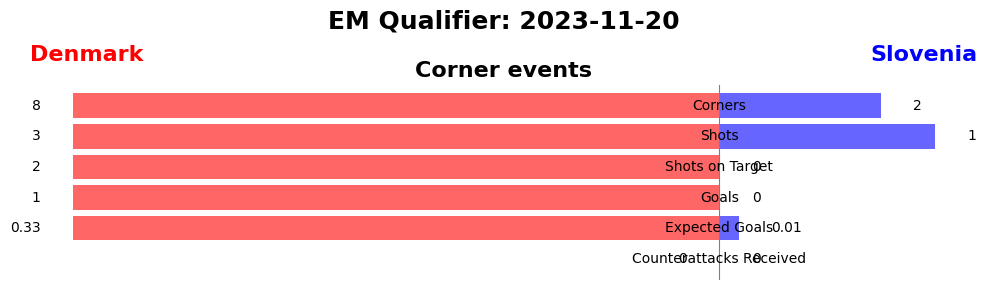

In [16]:
svn_data['Counterattacks Received'] = counterattacks_recveived_svn

opp_data['Counterattacks Received'] = counterattacks_recveived_opp

plot_stats_barchart(svn_data, opp_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='Corner events', team1_color='blue', team2_color='red')

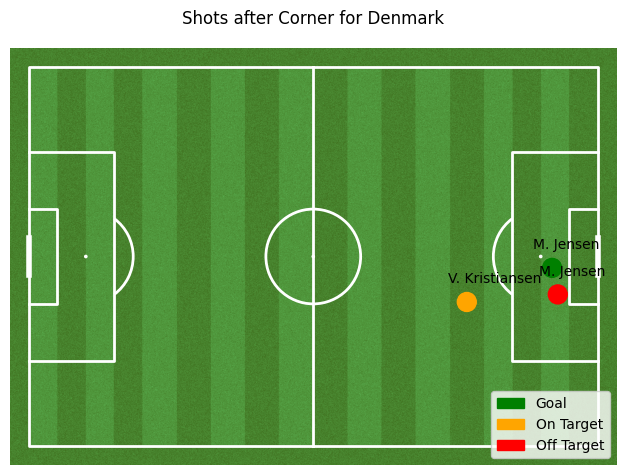

In [49]:
df_shots_opp = df_corners_opp[df_corners_opp['possession.attack.withShot'] == True]

pitch_length = 120
pitch_width = 80
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

teamname = "placeholder"

for i, shot in df_shots_opp.iterrows():
    
    # Position of shot
    [x, y] = shot[['possession.endLocation.x', 'possession.endLocation.y']].to_list()

    team_name = shot['team.name']

    # Color of shot depends on if it was on target or goal
    if shot['possession.attack.withGoal'] is True:
        color = "green"

    elif shot['possession.attack.withShotOnGoal'] is True:
        color = "orange"

    else:
        color = "red"

    shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

    plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, shot['player.name'])

    ax.add_patch(shotCircle)
    teamname = shot['team.name']

# Define the legend labels and corresponding colors
legend_labels = ['Goal', 'On Target', 'Off Target']
legend_colors = ['green', 'orange', 'red']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

#set title
fig.suptitle(f"Shots after Corner for {teamname}", fontsize = 12)
plt.savefig(f"plots/{teamname}_shots_corners_map.png", dpi=400)
plt.show()

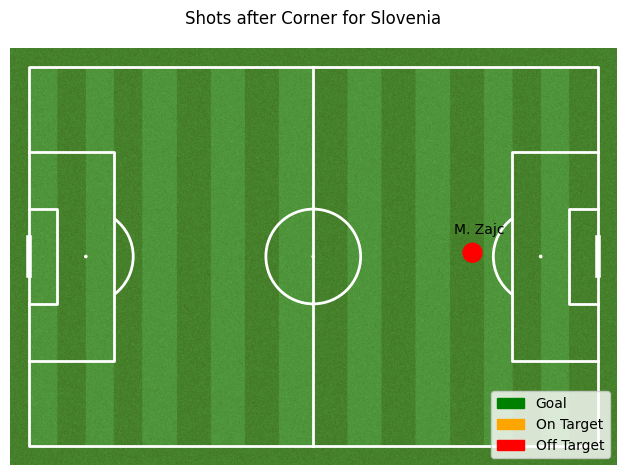

In [51]:
df_shots_svn = df_corners_svn[df_corners_svn['possession.attack.withShot'] == True]

pitch_length = 120
pitch_width = 80
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

team_name = "placeholder"

for i, shot in df_shots_svn.iterrows():
    
    # Position of shot
    [x, y] = shot[['possession.endLocation.x', 'possession.endLocation.y']].to_list()

    team_name = shot['team.name']

    # Color of shot depends on if it was on target or goal
    if shot['possession.attack.withGoal'] is True:
        color = "green"

    elif shot['possession.attack.withShotOnGoal'] is True:
        color = "orange"

    else:
        color = "red"

    shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

    plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, shot['player.name'])

    ax.add_patch(shotCircle)

# Define the legend labels and corresponding colors
legend_labels = ['Goal', 'On Target', 'Off Target']
legend_colors = ['green', 'orange', 'red']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

#set title
fig.suptitle(f"Shots after Corner for {team_name}", fontsize = 12)
plt.savefig(f"plots/{team_name}_shots_corners_map.png", dpi=400)
plt.show()

### 5.2 Penalties

In [18]:
df_penalties = df_events[df_events['type.primary']=='penalty']

### 5.3 Free Kicks

In [19]:
df_freekicks = df_events[df_events['type.primary'] == 'free_kick']

In [20]:
df_names = ['aerialDuel', 'location.x', 'location.y', 'team.id', 'team.name', 'opponentTeam.id', \
              'opponentTeam.name', 'player.id', 'player.name', 'player.position', 'pass.accurate', \
              'pass.angle', 'pass.height', 'pass.length', 'pass.recipient.id', 'pass.recipient.name', \
              'pass.recipient.position', 'pass.endLocation.x', 'pass.endLocation.y', \
              'aerialDuel.opponent.id', 'aerialDuel.opponent.name', 'aerialDuel.opponent.position', \
              'aerialDuel.opponent.height', 'aerialDuel.firstTouch', 'aerialDuel.height', \
              'aerialDuel.relatedDuelId','shot.bodyPart', 'shot.isGoal', 'shot.onTarget', \
              'shot.goalZone', 'shot.xg', 'shot.postShotXg', 'shot.goalkeeperActionId', \
              'shot.goalkeeper.id', 'shot.goalkeeper.name', 'shot.goalkeeper']